In [181]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ตรวจสอบข้อมูล Data Understanding

ตรวจสอบ games.csv 

In [63]:
#ตรวจสอบข้อมูล games.csv
df_games = pd.read_csv('games.csv')
df_games

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [51]:
print(df_games.dtypes)

app_id              int64
title              object
date_release       object
win                  bool
mac                  bool
linux                bool
rating             object
positive_ratio      int64
user_reviews        int64
price_final       float64
price_original    float64
discount          float64
steam_deck           bool
dtype: object


In [4]:
# เช็คว่ามีข้อมูลว่างใน DataFrame 
missing_data_count = df_games.isnull().sum()
print("จำนวนข้อมูลว่างในแต่ละคอลัมน์:")
print(missing_data_count)

จำนวนข้อมูลว่างในแต่ละคอลัมน์:
app_id            0
title             0
date_release      0
win               0
mac               0
linux             0
rating            0
positive_ratio    0
user_reviews      0
price_final       0
price_original    0
discount          0
steam_deck        0
dtype: int64


In [67]:
new_df_games = df_games.drop_duplicates(subset=['title'])
print("รายชื่อเกมที่ไม่ซ้ำกัน:")
new_df_games


รายชื่อเกมที่ไม่ซ้ำกัน:


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50868,1272080,PAYDAY 3,2023-09-21,True,False,False,Mostly Negative,38,29458,40.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [103]:
rating_positive_stats = new_df_games.groupby('rating')['positive_ratio'].agg(['count', 'mean', 'median', 'min', 'max'])

print("สถิติของ positive_ratio ตาม rating:")
print(rating_positive_stats)


สถิติของ positive_ratio ตาม rating:
                         count       mean  median  min  max
rating                                                     
Mixed                    12106  57.648274    60.0   40   69
Mostly Negative           1836  31.294662    32.0   20   39
Mostly Positive           8728  74.555568    75.0   70   79
Negative                   302  11.890728    13.0    0   19
Overwhelmingly Negative     14  14.214286    15.0    9   18
Overwhelmingly Positive   1110  96.240541    96.0   95  100
Positive                 13469  91.208701    91.0   80  100
Very Negative               60  13.633333    14.0    5   19
Very Positive            13126  88.802834    89.0   80  100


In [104]:
very_positive_games = new_df_games[new_df_games['rating'] == 'Very Positive']
print("เกมที่มีคะแนนรีวิวเป็น 'Very Positive':")
very_positive_games


เกมที่มีคะแนนรีวิวเป็น 'Very Positive':


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0.0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0.0,True
5,250180,METAL SLUG 3,2015-09-14,True,False,False,Very Positive,90,5579,7.99,7.99,0.0,True
8,282900,Hyperdimension Neptunia Re;Birth1,2015-01-29,True,False,False,Very Positive,94,9686,14.99,14.99,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50863,1341490,Hellsweeper VR,2023-09-21,True,False,False,Very Positive,80,94,30.00,0.00,0.0,True
50867,2296380,I Expect You To Die 3: Cog in the Machine,2023-09-28,True,False,False,Very Positive,96,101,22.00,0.00,0.0,True
50869,1402110,Eternights,2023-09-11,True,False,False,Very Positive,89,1128,30.00,0.00,0.0,True
50870,2272250,Forgive Me Father 2,2023-10-19,True,False,False,Very Positive,95,82,17.00,0.00,0.0,True


In [102]:
unique_ratings = new_df_games['rating'].unique()
print("Rating ที่ไม่ซ้ำกัน:")
print(unique_ratings)

Rating ที่ไม่ซ้ำกัน:
['Very Positive' 'Positive' 'Mixed' 'Mostly Positive'
 'Overwhelmingly Positive' 'Negative' 'Mostly Negative'
 'Overwhelmingly Negative' 'Very Negative']


ตรวจสอบ recommendations.csv 

In [6]:
#ตรวจสอบข้อมูล recommendations.csv
df_recommendations = pd.read_csv('recommendations.csv')
df_recommendations
# print(df_recommendations.dtypes) 

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,0,0,2022-12-12,True,36.3,51580,0
1,304390,4,0,2017-02-17,False,11.5,2586,1
2,1085660,2,0,2019-11-17,True,336.5,253880,2
3,703080,0,0,2022-09-23,True,27.4,259432,3
4,526870,0,0,2021-01-10,True,7.9,23869,4
...,...,...,...,...,...,...,...,...
41154789,633230,0,0,2021-02-15,True,41.0,1606890,41154789
41154790,758870,8,0,2019-07-18,False,8.0,1786254,41154790
41154791,696170,3,10,2018-03-26,False,2.0,6370324,41154791
41154792,696170,0,0,2018-06-11,True,4.0,1044289,41154792


In [52]:
print(df_recommendations.dtypes)

app_id              int64
helpful             int64
funny               int64
date               object
is_recommended       bool
hours             float64
user_id             int64
review_id           int64
dtype: object


In [16]:
# เช็คว่ามีข้อมูลว่างใน DataFrame 
missing_data_count = df_recommendations.isnull().sum()
print("จำนวนข้อมูลว่างในแต่ละคอลัมน์:")
print(missing_data_count)

จำนวนข้อมูลว่างในแต่ละคอลัมน์:
app_id            0
helpful           0
funny             0
date              0
is_recommended    0
hours             0
user_id           0
review_id         0
dtype: int64


In [73]:
#นับจำนวนครั้งของแต่ละ app_id ที่ซ้ำกันแล้วแสดงผลลัพธ์ออกมาเป็น Series ที่ประกอบด้วย app_id และจำนวนครั้งที่ซ้ำกันสำหรับแต่ละ app_id
duplicated_app_ids = df_recommendations.groupby('app_id').size().reset_index(name='count')
# กรองเฉพาะ app_id ที่มีจำนวนครั้งการซ้ำกันมากกว่าหรือเท่ากับ 2 ครั้ง
duplicated_app_ids = duplicated_app_ids[duplicated_app_ids['count'] >= 2]
print(duplicated_app_ids)

        app_id  count
0           10  41043
1           20   4284
2           30   4432
3           40   1610
4           50   9721
...        ...    ...
37604  2245840     11
37605  2245890      8
37606  2246290      5
37608  2251240      3
37609  2253290      3

[37319 rows x 2 columns]


ตรวจสอบ users.csv 

In [79]:
df_users = pd.read_csv('users.csv')
df_users

,user_id,products,reviews
0,7360263,359,0
1,14020781,156,1
2,8762579,329,4
3,4820647,176,4
4,5167327,98,2
...,...,...,...
14306059,5047430,6,0
14306060,5048153,0,0
14306061,5059205,31,0
14306062,5074363,0,0


# Data Visualization

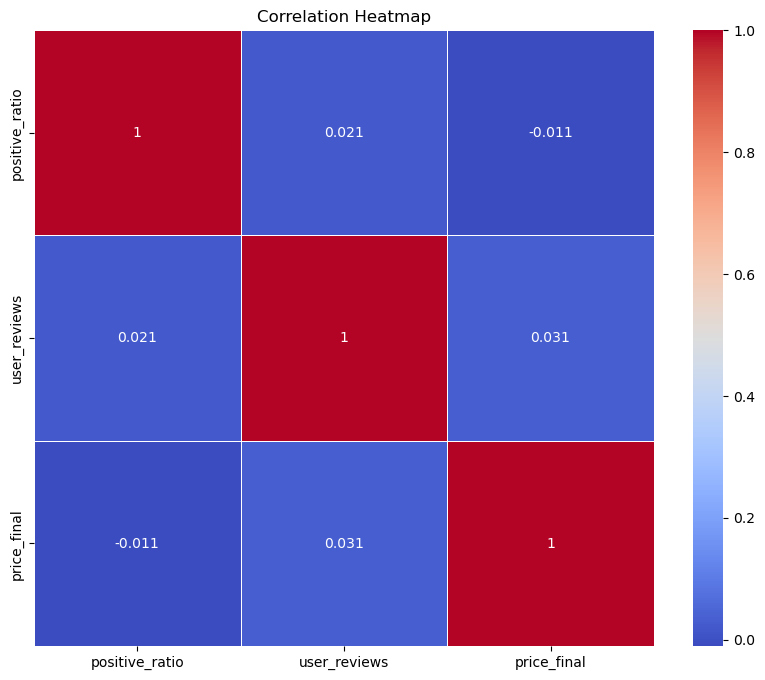

In [168]:
# สร้าง correlation matrix
corr_matrix = new_df_games[['positive_ratio', 'user_reviews', 'price_final']].corr()

# สร้าง heatmap
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## positive_ratio', 'user_reviews', 'price_final ไม่มีความสัมพันธ์กันมากนักใน DataFrame

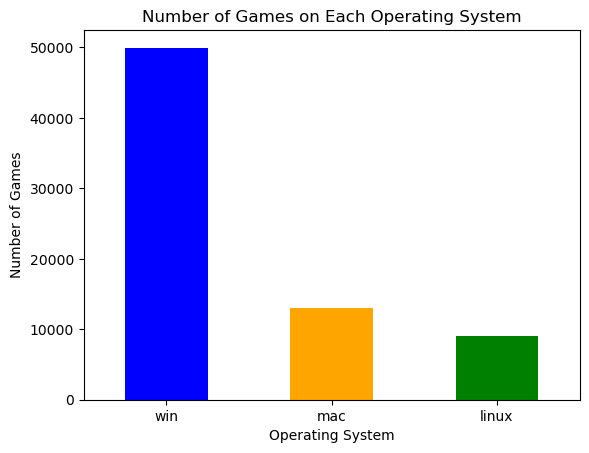

In [75]:
# จำนวนเกมที่มีในแต่ละระบบปฏิบัติการ
platform_counts = new_df_games[['win', 'mac', 'linux']].sum()
platform_counts.plot(kind='bar', color=['blue', 'orange', 'green'])
plt.title('Number of Games on Each Operating System')
plt.xlabel('Operating System')
plt.ylabel('Number of Games')
plt.xticks(rotation=0)
plt.show()

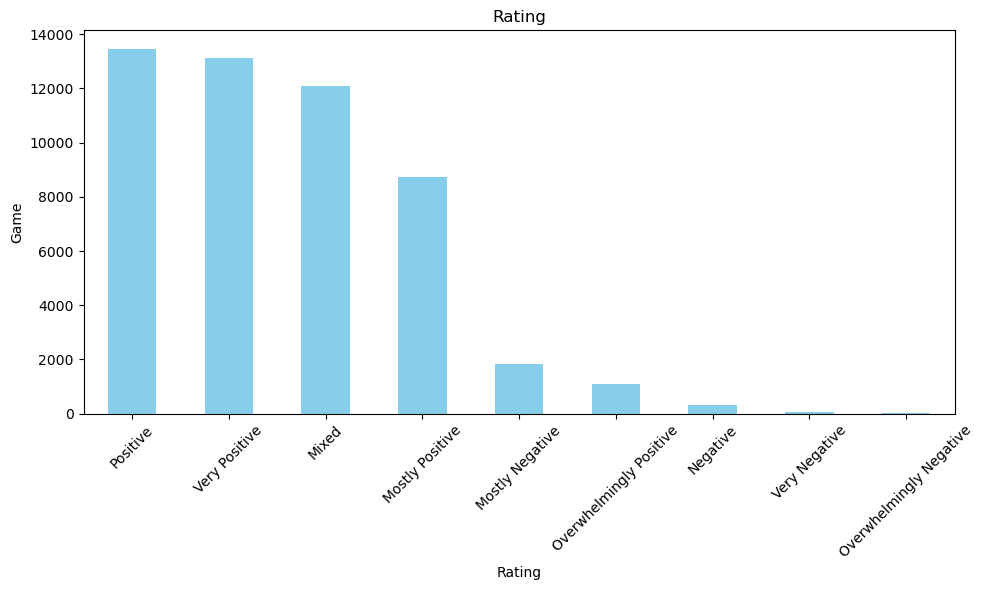

In [107]:
# นับจำนวนของเกมในแต่ละ rating
rating_counts = new_df_games['rating'].value_counts()
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.title('Rating')
plt.xlabel('Rating')
plt.ylabel('Game')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## ส่วนใหญ่เกมมักจะรองรับกับ window 

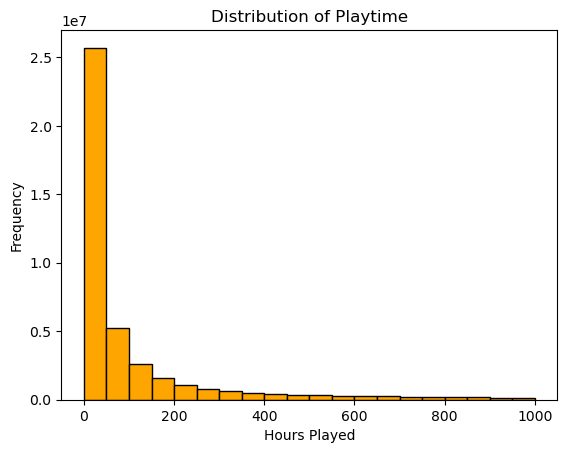

In [80]:
#เวลาเล่นเกมของผู้ใช้
plt.hist(df_recommendations['hours'], bins=20, color='orange', edgecolor='black')
plt.title('Distribution of Playtime')
plt.xlabel('Hours Played')
plt.ylabel('Frequency')
plt.show()

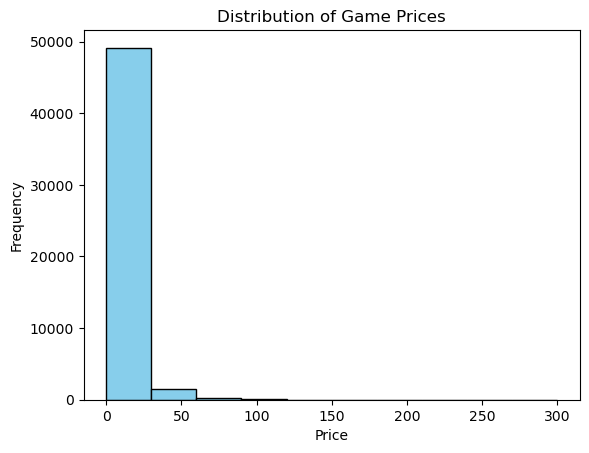

In [94]:
# นำเสนอราคาของเกม
plt.hist(df_games['price_final'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Game Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

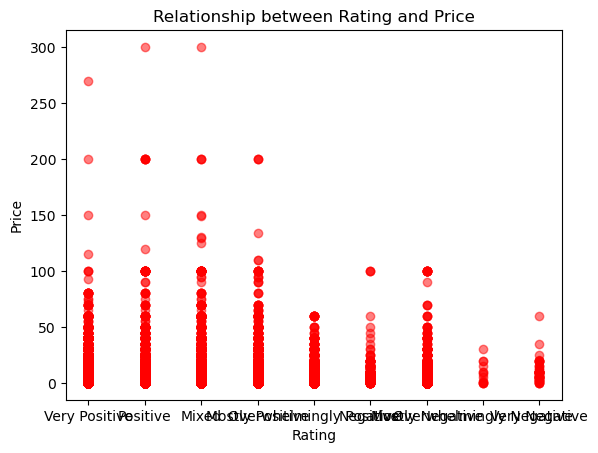

In [57]:
# ความสัมพันธ์ระหว่างราคาและคะแนน
plt.scatter(df_games['rating'], df_games['price_final'], color='red', alpha=0.5)
plt.title('Relationship between Rating and Price')
plt.xlabel('Rating')
plt.ylabel('Price')
plt.show()

## Hypothesis Testing

In [149]:
# ทำ left join ระหว่าง games.csv และ recommendations.csv โดยใช้ app_id เป็น key
df_right_join = new_df_games.merge(df_recommendations, on='app_id', how='right')

# แสดงผลลัพธ์
df_right_join


,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,helpful,funny,date,is_recommended,hours,user_id,review_id
0,975370,Dwarf Fortress,2022-12-06,True,False,False,Overwhelmingly Positive,95.0,19665.0,30.00,0.00,0.0,True,0,0,2022-12-12,True,36.3,51580,0
1,304390,FOR HONOR™,2017-02-13,True,False,False,Mixed,69.0,82277.0,15.00,0.00,0.0,True,4,0,2017-02-17,False,11.5,2586,1
2,1085660,Destiny 2,2019-10-01,True,False,False,Very Positive,81.0,562723.0,0.00,0.00,0.0,True,2,0,2019-11-17,True,336.5,253880,2
3,703080,Planet Zoo,2019-11-05,True,False,False,Very Positive,90.0,60113.0,45.00,0.00,0.0,True,0,0,2022-09-23,True,27.4,259432,3
4,526870,Satisfactory,2020-06-08,True,False,False,Overwhelmingly Positive,97.0,119866.0,30.00,0.00,0.0,True,0,0,2021-01-10,True,7.9,23869,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41154789,633230,NARUTO TO BORUTO: SHINOBI STRIKER,2023-06-29,True,False,False,Very Positive,85.0,40328.0,20.00,0.00,0.0,True,0,0,2021-02-15,True,41.0,1606890,41154789
41154790,758870,Kynseed,2022-12-06,True,False,False,Very Positive,80.0,2125.0,24.99,24.99,0.0,True,8,0,2019-07-18,False,8.0,1786254,41154790
41154791,696170,SENRAN KAGURA Peach Beach Splash,2018-03-07,True,False,False,Very Positive,80.0,3312.0,29.99,29.99,0.0,True,3,10,2018-03-26,False,2.0,6370324,41154791
41154792,696170,SENRAN KAGURA Peach Beach Splash,2018-03-07,True,False,False,Very Positive,80.0,3312.0,29.99,29.99,0.0,True,0,0,2018-06-11,True,4.0,1044289,41154792


In [150]:
df=df_right_join[['app_id', 'title', 'rating', 'positive_ratio', 'user_reviews', 'price_final', 'is_recommended']]

In [151]:
df

,app_id,title,rating,positive_ratio,user_reviews,price_final,is_recommended
0,975370,Dwarf Fortress,Overwhelmingly Positive,95.0,19665.0,30.00,True
1,304390,FOR HONOR™,Mixed,69.0,82277.0,15.00,False
2,1085660,Destiny 2,Very Positive,81.0,562723.0,0.00,True
3,703080,Planet Zoo,Very Positive,90.0,60113.0,45.00,True
4,526870,Satisfactory,Overwhelmingly Positive,97.0,119866.0,30.00,True
...,...,...,...,...,...,...,...
41154789,633230,NARUTO TO BORUTO: SHINOBI STRIKER,Very Positive,85.0,40328.0,20.00,True
41154790,758870,Kynseed,Very Positive,80.0,2125.0,24.99,False
41154791,696170,SENRAN KAGURA Peach Beach Splash,Very Positive,80.0,3312.0,29.99,False
41154792,696170,SENRAN KAGURA Peach Beach Splash,Very Positive,80.0,3312.0,29.99,True


In [152]:
unique_app_ids = df['app_id'].nunique()
print("จำนวน app_id ที่แตกต่างกัน:", unique_app_ids)

จำนวน app_id ที่แตกต่างกัน: 37610


In [153]:
df_new=df[['app_id', 'title', 'rating', 'positive_ratio', 'user_reviews', 'price_final']]

In [154]:
df_new

,app_id,title,rating,positive_ratio,user_reviews,price_final
0,975370,Dwarf Fortress,Overwhelmingly Positive,95.0,19665.0,30.00
1,304390,FOR HONOR™,Mixed,69.0,82277.0,15.00
2,1085660,Destiny 2,Very Positive,81.0,562723.0,0.00
3,703080,Planet Zoo,Very Positive,90.0,60113.0,45.00
4,526870,Satisfactory,Overwhelmingly Positive,97.0,119866.0,30.00
...,...,...,...,...,...,...
41154789,633230,NARUTO TO BORUTO: SHINOBI STRIKER,Very Positive,85.0,40328.0,20.00
41154790,758870,Kynseed,Very Positive,80.0,2125.0,24.99
41154791,696170,SENRAN KAGURA Peach Beach Splash,Very Positive,80.0,3312.0,29.99
41154792,696170,SENRAN KAGURA Peach Beach Splash,Very Positive,80.0,3312.0,29.99


In [155]:
df_cleaned = df_new.drop_duplicates(subset=['app_id'])
df_cleaned

,app_id,title,rating,positive_ratio,user_reviews,price_final
0,975370,Dwarf Fortress,Overwhelmingly Positive,95.0,19665.0,30.00
1,304390,FOR HONOR™,Mixed,69.0,82277.0,15.00
2,1085660,Destiny 2,Very Positive,81.0,562723.0,0.00
3,703080,Planet Zoo,Very Positive,90.0,60113.0,45.00
4,526870,Satisfactory,Overwhelmingly Positive,97.0,119866.0,30.00
...,...,...,...,...,...,...
40934102,1272160,The Life and Suffering of Sir Brante,Very Positive,91.0,4429.0,19.99
40942658,1769170,Shattered Pixel Dungeon,Overwhelmingly Positive,96.0,709.0,9.99
40956426,1246250,An Airport for Aliens Currently Run by Dogs,Very Positive,91.0,137.0,19.99
40958079,510540,Long Gone Days,Very Positive,93.0,249.0,14.99


In [156]:
# กลุ่มแถวโดยใช้ app_id และนับความถูกต้องของ is_recommended ในแต่ละกลุ่ม
recommendation_counts = df.groupby(['app_id', 'is_recommended']).size().unstack(fill_value=0)

# หาคำนวณร้อยละของ True และ False สำหรับแต่ละ app_id
recommendation_counts['percent_true'] = recommendation_counts[True] / (recommendation_counts[True] + recommendation_counts[False]) * 100
recommendation_counts['percent_false'] = recommendation_counts[False] / (recommendation_counts[True] + recommendation_counts[False]) * 100

recommendation_counts


is_recommended,False,True,percent_true,percent_false
app_id,,,,
10,1711,39332,95.831201,4.168799
20,599,3685,86.017740,13.982260
30,455,3977,89.733755,10.266245
40,310,1300,80.745342,19.254658
50,438,9283,95.494291,4.505709
...,...,...,...,...
2245890,1,7,87.500000,12.500000
2246290,0,5,100.000000,0.000000
2248870,1,0,0.000000,100.000000


In [157]:
# ทำการรวม DataFrame ด้วยคอลัมน์ 'app_id'
merged_df = pd.merge(df_cleaned, recommendation_counts, on='app_id')

# แสดงผลลัพธ์
merged_df

,app_id,title,rating,positive_ratio,user_reviews,price_final,False,True,percent_true,percent_false
0,975370,Dwarf Fortress,Overwhelmingly Positive,95.0,19665.0,30.00,547,14366,96.332059,3.667941
1,304390,FOR HONOR™,Mixed,69.0,82277.0,15.00,27754,64114,69.789263,30.210737
2,1085660,Destiny 2,Very Positive,81.0,562723.0,0.00,33524,152003,81.930393,18.069607
3,703080,Planet Zoo,Very Positive,90.0,60113.0,45.00,3750,33440,89.916644,10.083356
4,526870,Satisfactory,Overwhelmingly Positive,97.0,119866.0,30.00,2548,91918,97.302733,2.697267
...,...,...,...,...,...,...,...,...,...,...
37605,1272160,The Life and Suffering of Sir Brante,Very Positive,91.0,4429.0,19.99,153,1896,92.532943,7.467057
37606,1769170,Shattered Pixel Dungeon,Overwhelmingly Positive,96.0,709.0,9.99,8,369,97.877984,2.122016
37607,1246250,An Airport for Aliens Currently Run by Dogs,Very Positive,91.0,137.0,19.99,6,66,91.666667,8.333333
37608,510540,Long Gone Days,Very Positive,93.0,249.0,14.99,3,96,96.969697,3.030303


# Correlation Analysis

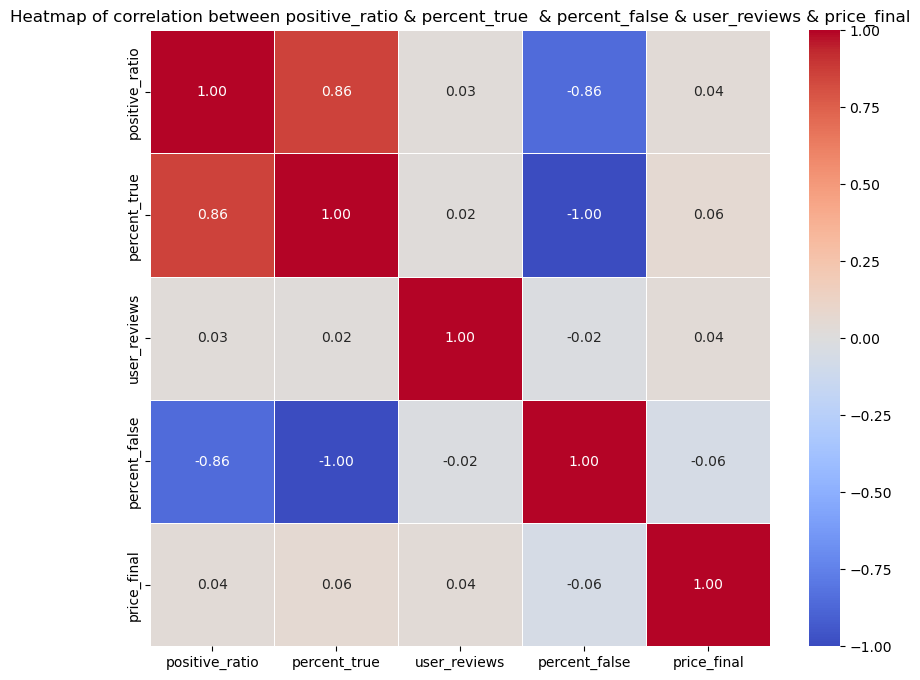

In [176]:
# สร้าง Heatmap จากความสัมพันธ์ระหว่าง 'positive_ratio' และ 'percent_true'
plt.figure(figsize=(10, 8))
heatmap = sns.heatmap(merged_df[['positive_ratio', 'percent_true','user_reviews','percent_false','price_final']].corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of correlation between positive_ratio & percent_true  & percent_false & user_reviews & price_final')
plt.show()

Title: Counter-Strike: Global Offensive
User Reviews: 7494460.0
Percent True: 84.79
Percent False: 15.21



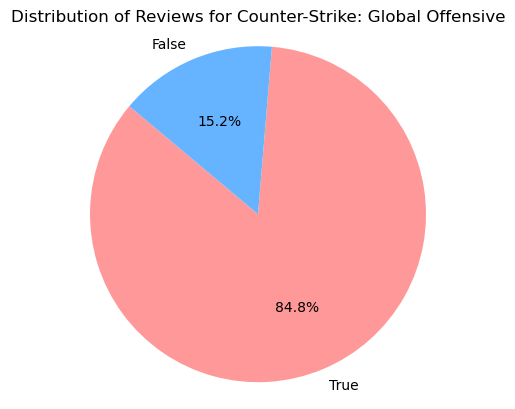

Title: PUBG: BATTLEGROUNDS
User Reviews: 2217226.0
Percent True: 51.70
Percent False: 48.30



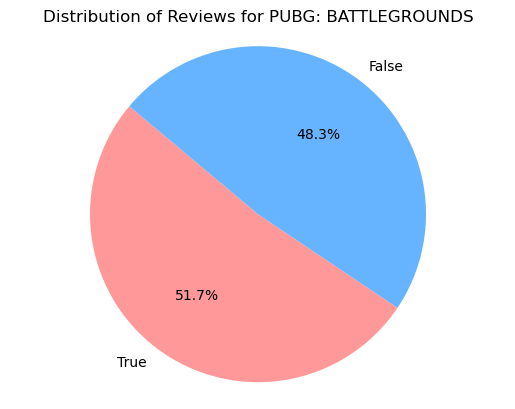

Title: Dota 2
User Reviews: 2045628.0
Percent True: 79.22
Percent False: 20.78



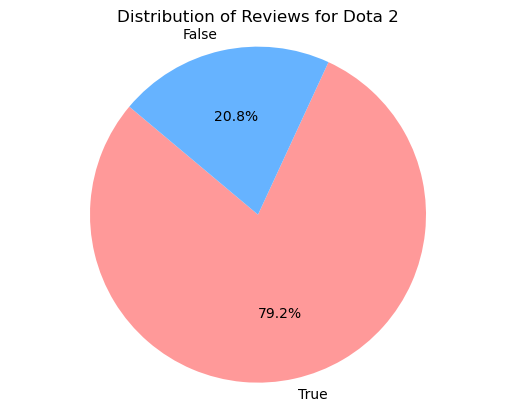

Title: Grand Theft Auto V
User Reviews: 1484122.0
Percent True: 68.29
Percent False: 31.71



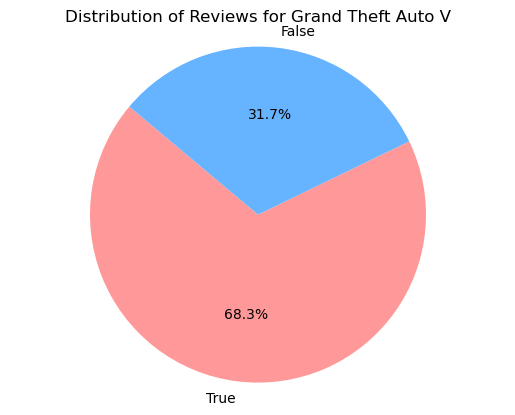

Title: Tom Clancy's Rainbow Six® Siege
User Reviews: 993312.0
Percent True: 81.93
Percent False: 18.07



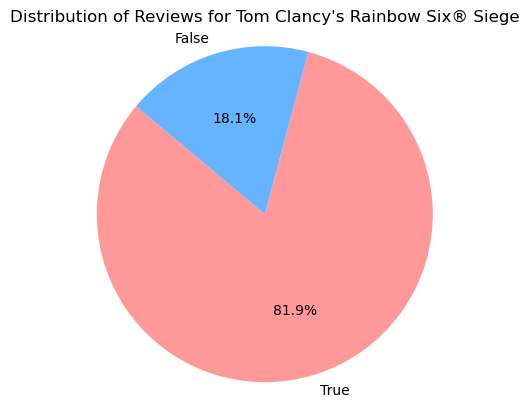

In [189]:
sorted_df = merged_df.sort_values(by='user_reviews', ascending=False)

# เลือก 5 เกมที่มี user_reviews มากที่สุด
top_5_games = sorted_df.iloc[:5]


# แสดง 5 เกมที่มี user_reviews มากที่สุดพร้อมกับ percent_true และ percent_false ของแต่ละเกม
for index, game in top_5_games.iterrows():
    print("Title:", game['title'])
    print("User Reviews:", game['user_reviews'])
    print("Percent True: {:.2f}".format(game['percent_true']))
    print("Percent False: {:.2f}".format(game['percent_false']))

    print()

    labels = ['True', 'False']
    sizes = [game['percent_true'], game['percent_false']]
    colors = ['#ff9999','#66b3ff']
    explode = (0.1, 0)  # พิเศษเนื่องจากต้องการให้ส่วนของ True เด่นออกจากกลุ่ม

    plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Reviews for ' + game['title'])
    plt.axis('equal')  # ทำให้วงกลมเป็นวงกลมแท้
    plt.show()


Title: Terraria
User Reviews: 943413.0
Percent True: 99.44
Percent False: 0.56



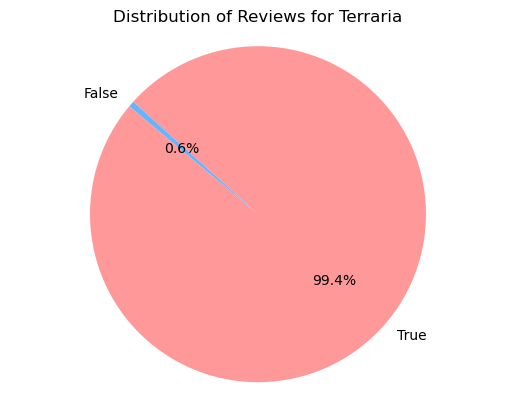

Title: Garry's Mod
User Reviews: 853733.0
Percent True: 95.83
Percent False: 4.17



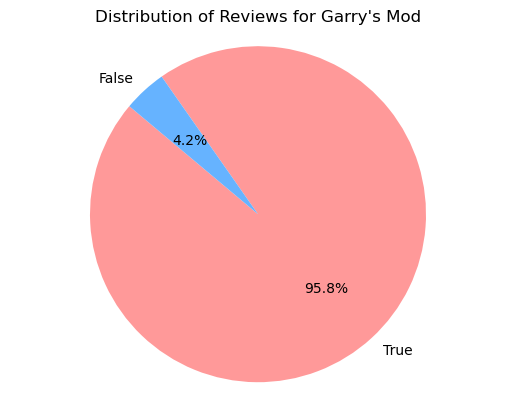

Title: Wallpaper Engine
User Reviews: 637341.0
Percent True: 98.24
Percent False: 1.76



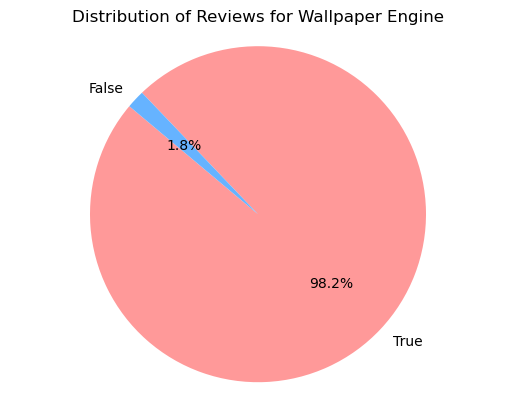

Title: Left 4 Dead 2
User Reviews: 574470.0
Percent True: 96.05
Percent False: 3.95



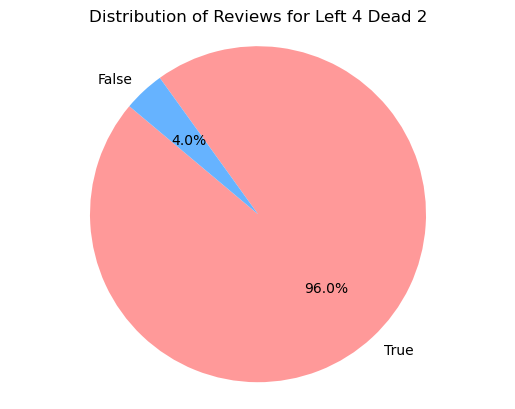

Title: Stardew Valley
User Reviews: 505882.0
Percent True: 97.25
Percent False: 2.75



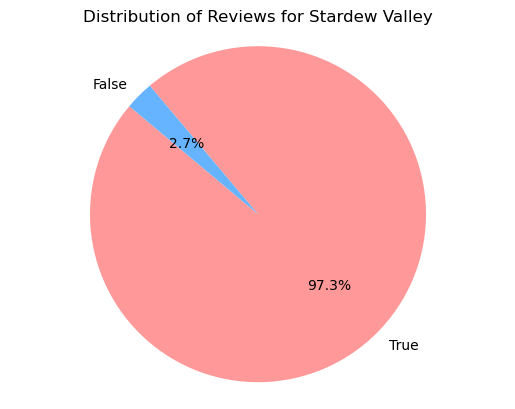

In [192]:
import matplotlib.pyplot as plt

sorted_df = merged_df.sort_values(by='user_reviews', ascending=False)

# Select the top 5 games with the highest number of user_reviews and positive_ratio > 95
top_5_games = sorted_df[(sorted_df['user_reviews'] > 0) & (sorted_df['percent_true'] > 95)].head(5)

# Display the top 5 games along with their percent_true and percent_false
for index, game in top_5_games.iterrows():
    print("Title:", game['title'])
    print("User Reviews:", game['user_reviews'])
    print("Percent True: {:.2f}".format(game['percent_true']))
    print("Percent False: {:.2f}".format(game['percent_false']))
    print()

    labels = ['True', 'False']
    sizes = [game['percent_true'], game['percent_false']]
    colors = ['#ff9999', '#66b3ff']
    explode = (0.1, 0)  # Explode to highlight the 'True' slice

    plt.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Reviews for ' + game['title'])
    plt.axis('equal')  # Make the pie chart circular
    plt.show()
